# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, how = "left")
# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [26]:
# Checking the number of mice.
micecount = merged_df["Mouse ID"].nunique()
micecount

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicate_mice                                             

array(['g989'], dtype=object)

In [27]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = merged_df[merged_df["Mouse ID"] == "g989"]
duplicate_data.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df.drop(merged_df[merged_df["Mouse ID"] == "g989"].index)

cleaned_df.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [8]:
# Checking the number of mice in the clean DataFrame.
micecount = merged_df["Mouse ID"].nunique()
micecount

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance_tumor = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_tumor = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_tumor = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

                                
                                  
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor,
                          "Median Tumor Volume": median_tumor,
                          "Tumor Volume Variance": variance_tumor,
                          "Tumor Volume Std. Dev.": std_tumor,
                          "Tumor Volume Std. Err.": sem_tumor})
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

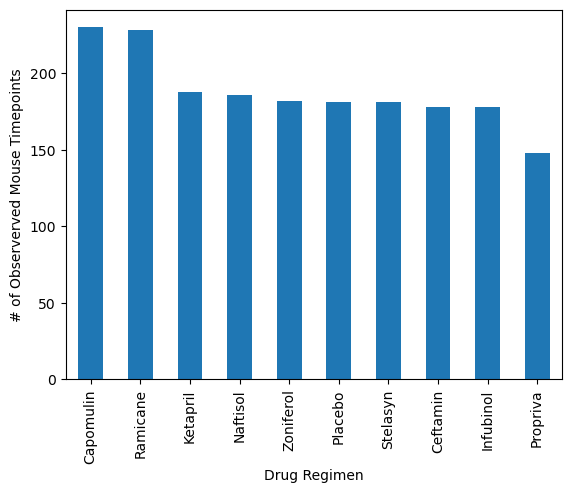

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_groups = cleaned_df.groupby("Drug Regimen")
regimen_counts = regimen_groups["Mouse ID"].count()
sorted_counts = regimen_counts.sort_values(ascending=False)
regimen_chart = sorted_counts.plot(x = "regimen_groups", y = "regimen_counts", kind = "bar")
regimen_chart.set_xlabel("Drug Regimen")
regimen_chart.set_ylabel("# of Observerved Mouse Timepoints")
plt.show()

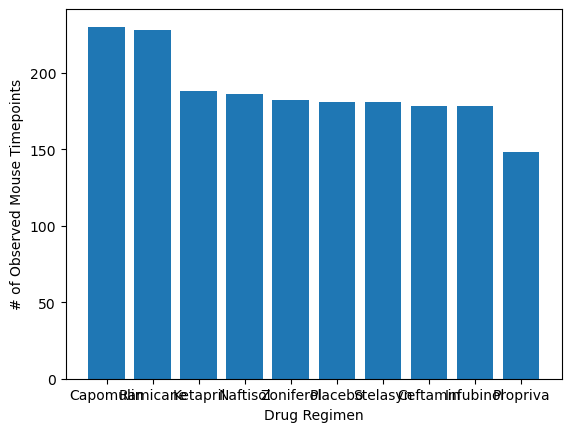

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_groups = cleaned_df.groupby("Drug Regimen")
regimen_counts = regimen_groups["Mouse ID"].count()
sorted_counts = regimen_counts.sort_values(ascending=False)
plt.bar(sorted_counts.index, sorted_counts)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

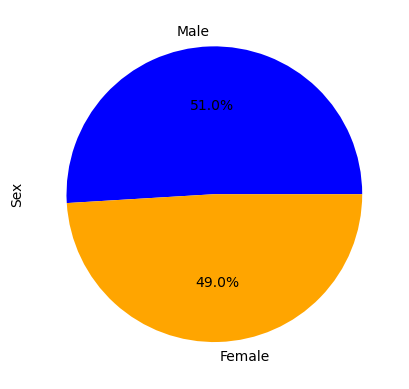

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


male_counts = males.groupby("Sex").size()["Male"]
female_counts = females.groupby("Sex").size()["Female"]

labels = ["Male", "Female"]
pie_counts = [male_counts, female_counts]
colors = ["blue", "orange"]

data = pd.Series(pie_counts, index = labels)
data.plot(kind = "pie", colors = colors, autopct = "%1.1f%%", ylabel = "Sex")

plt.show()

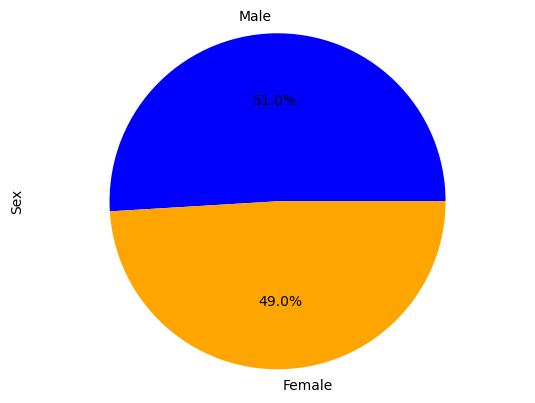

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


male_counts = males.groupby("Sex").size()["Male"]
female_counts = females.groupby("Sex").size()["Female"]

labels = ["Male", "Female"]
pie_counts = [male_counts, female_counts]
colors = ["blue", "orange"]

plt.pie(pie_counts, labels = labels, colors = colors, autopct = "%1.1f%%")
plt.axis("equal")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens = cleaned_df.loc[((cleaned_df["Drug Regimen"] =="Capomulin")|(cleaned_df["Drug Regimen"] =="Ramicane")|(cleaned_df["Drug Regimen"] =="Infubinol")|(cleaned_df["Drug Regimen"] =="Ceftamin"))]
id_regimen = regimens.groupby(["Mouse ID"])
# Start by getting the last (greatest) timepoint for each mouse
timepoints = pd.DataFrame(id_regimen["Timepoint"].max())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = pd.merge(timepoints, cleaned_df, on=["Mouse ID", "Timepoint"])

final_tumor_volumes

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tvol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volumes.loc[final_tumor_volumes["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    
    # add subset 
    tvol_data.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
    
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


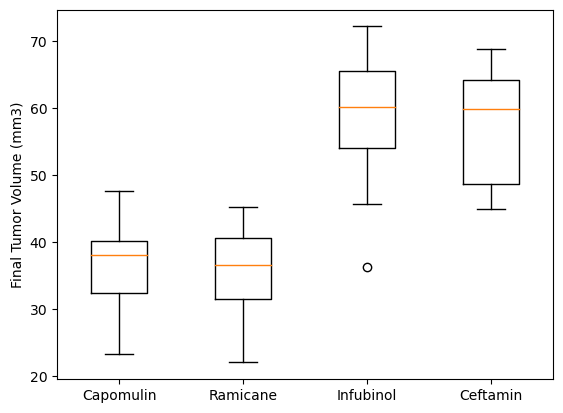

In [29]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()

ax.boxplot(tvol_data, labels = treatments)

ax.set_ylabel("Final Tumor Volume (mm3)")

plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

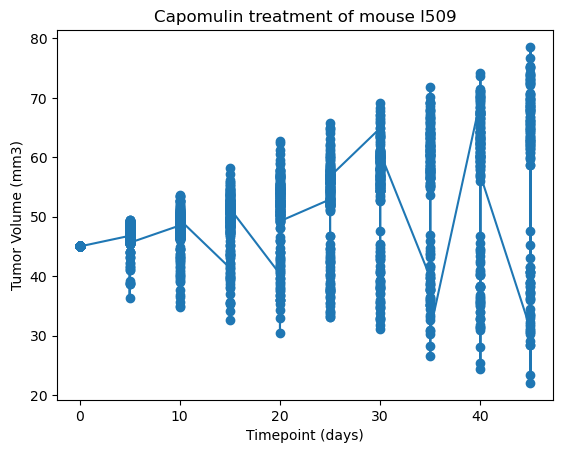

In [39]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "l509"
treatment_regimen = "Capomulin"

filtered_data = final_tumor_volumes[(final_tumor_volumes["Mouse ID"] == mouse_id) & (final_tumor_volumes["Drug Regimen"] == treatment_regimen)]

plt.plot(cleaned_df["Timepoint"], cleaned_df["Tumor Volume (mm3)"], marker='o')

plt.title(f"Capomulin treatment of mouse {mouse_id}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

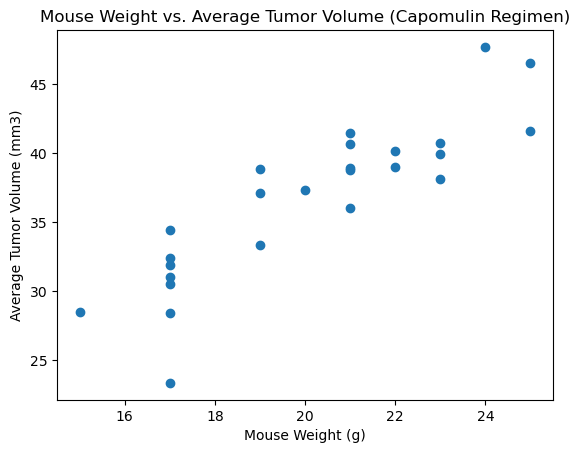

In [40]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for Capomulin regimen
capomulin_data = final_tumor_volumes[final_tumor_volumes["Drug Regimen"] == "Capomulin"]

# Get the mouse weights
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Calculate the average observed tumor volume
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Generate the scatter plot
plt.scatter(mouse_weights, average_tumor_volume)

# Set the title and labels
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")



# Display the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


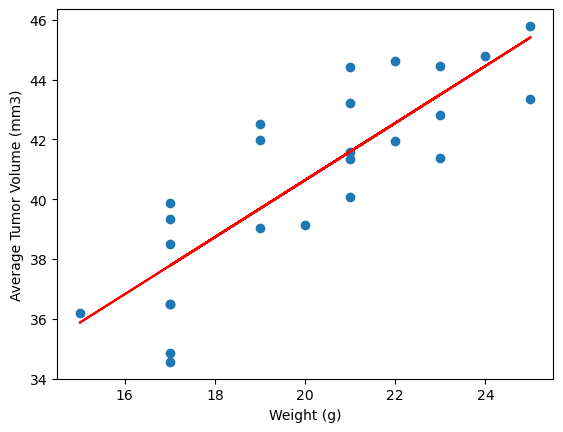

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
